Image Classification
--

**Input dataset**

MNIST (28x28 grayscale images of single digit numbers).

**Output classification**

Digit (0-9) with the highest value likelihood in probability 
distribution.

Background
--

**Layers**

*Dense*

Alternatively known as fully connected layers, are used for classification.
		
By reducing the number of nodes from the previous layer/input you get natural "classification" behaviour/characteristics.
		
**Activations**

*relu*

The default activation function when a clear situationally-specific activation function doesn't present itself. Converges well in general use cases and is computationally inexpensive.
		
Implemented as the function $f(x) = max(x, 0)$, the source of its efficiency becomes self-evident retaining non-linearity, which is essential for learning complex features/concepts.
		
*softmax*

Used in multi-class classifcation to generate probabilities for each of the classes.
		
Normalizes the output vector such that the sum of its elements equals 1, thus, the output vector can be interpreted as a probability distribution.
		
**Optimizers**

*rmsprop*

Generally good optimization function with tunable learning rate parameters.
		
Behaves similarly to gradient descent with momentum by normalizing the learning rate by a weighted, running average of the magnitudes of recent gradients.
		
**Loss functions**
	
*categorical corssentropy*

Measures the predictive performance of multi-class classifcation models.
		
Implemented as the function $L = -\mathbf{y} \cdot log(\hat{ \mathbf{y} })$, when $\mathbf{y}$ is the input label vector and $\hat{ \mathbf{y} }$ is the model's output "prediction vector."

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.2'

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [12]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [4]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [5]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [6]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
history = network.fit(train_images, train_labels,
            epochs=5,
            batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.2569 - acc: 0.9250
Epoch 2/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.1033 - acc: 0.9690
Epoch 3/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.0685 - acc: 0.9794
Epoch 4/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.0493 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.0375 - acc: 0.9885


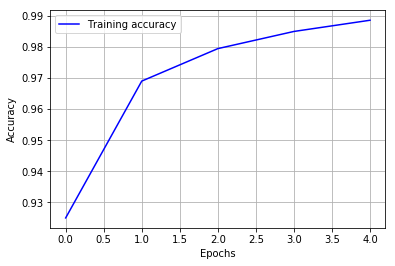

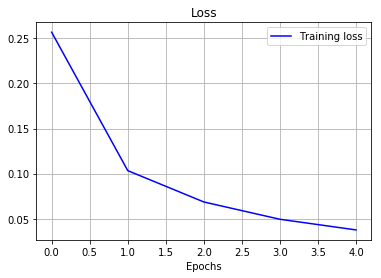

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.xlabel('Epochs')
plt.title('Loss')
plt.legend()
plt.grid()

plt.show()

In [9]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 62us/step


In [10]:
print('test_acc:', test_acc)

test_acc: 0.9771
